In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnnutils import *

plt.rcParams['figure.figsize']=(5.0,4.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'
np.random.seed(1)

In [2]:
##data load in dnnutils file 
train_x_orig,train_y,test_x_orig,test_y,classes=load_data()  

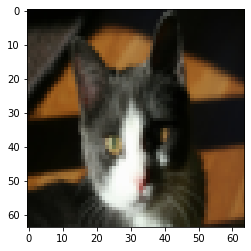

In [3]:
index=19
plt.imshow(train_x_orig[index])

In [4]:
m_train=train_x_orig.shape[0]
num_px=train_x_orig.shape[1]
m_test=test_x_orig.shape[0]

print('No of training eg:',m_train)
print('No of testing eg:',m_test)
print('each image size is:('+str(num_px)+','+str(num_px)+',3)',)
print('Training_x_orig shape:'+str(train_x_orig.shape))
print('train_y shape:'+str(train_y.shape))
print('Test_x_orig shape:'+str(test_x_orig.shape))
print('Test_y shape:'+str(test_y.shape))

No of training eg: 209
No of testing eg: 50
each image size is:(64,64,3)
Training_x_orig shape:(209, 64, 64, 3)
train_y shape:(1, 209)
Test_x_orig shape:(50, 64, 64, 3)
Test_y shape:(1, 50)


In [5]:
## trainig set in 4D ..so we need to reshape dim 

train_x_faltten=train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0],-1).T

train_x=train_x_faltten/255
test_x=test_x_flatten/255

print('train_x reshape:'+str(train_x.shape))
print('test_x reshape:'+str(test_x.shape))

train_x reshape:(12288, 209)
test_x reshape:(12288, 50)


In [6]:
n_x=12288  #input layer
n_h=7      # hidden layer
n_y=1      # op layer

layer_dim=(n_x,n_h,n_y)
learning_rate=0.0075

In [7]:
## initialize parameter

def initialize_parameter(n_x,n_h,n_y):
    np.random.seed(1)
    
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros([n_h,1])
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros([n_y,1])
    
    parameter={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    
    
    return parameter



In [12]:
def two_layer_model(X,Y,layer_dim,learning_rate=0.0075,num_iterations=3000,print_cost=False):
    
    np.random.seed(1)
    grads={}
    costs=[]
    m=X.shape[1]
    (n_x,n_h,n_y)=layer_dim
    
    parameter=initialize_parameter(n_x,n_h,n_y)
    
    
    W1=parameter['W1']
    b1=parameter['b1']
    W2=parameter['W2']
    b2=parameter['b2']
    
    for i in range(0,num_iterations):
        A1,cache1=linear_activation_forward(X,W1,b1,activation='relu')
        A2,cache2=linear_activation_forward(A1,W2,b2,activation='sigmoid')
        
        cost=compute_cost(A2,Y)
        
        
        
        dA2= -(np.divide(Y,A2)-np.divide(1-Y,1-A2))
               
        dA1,dW2,db2=linear_activation_backward(dA2,cache2,activation='sigmoid')
        dA0,dW1,db1=linear_activation_backward(dA1,cache1,activation='relu')
        
        grads['dW1']=dW1
        grads['db1']=db1
        grads['dW2']=dW2
        grads['db2']=db2
        
        
        parameter=update_parameters(parameter,grads,learning_rate)
        
        W1=parameter['W1']
        b1=parameter['b1']
        W2=parameter['W2']
        b2=parameter['b2']
        
        if print_cost and i%100==0 or i==num_iterations-1:
            print('cost after iteration {}:{}'.format(i,np.squeeze(cost)))
        if i%100==0 or i==num_iterations:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iteration per(100s)')
    plt.title('Learning rate='+str(learning_rate))
    plt.show()
    
    
    return parameter,costs
              
    

cost after iteration 2999:0.02809573975430016


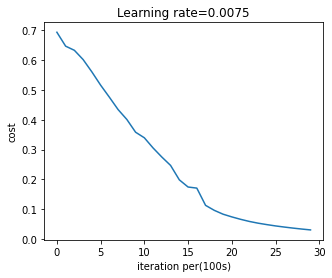

cost after first iteration:0.693049735659989


In [14]:
parameter,costs=two_layer_model(train_x,train_y,layer_dim=(n_x,n_h,n_y),num_iterations=3000,print_cost=False)
print('cost after first iteration:'+str(costs[0]))

In [15]:
pred_train=predict(train_x,train_y,parameter)

Accuracy: 0.9999999999999998


In [16]:
pred_test=predict(test_x,test_y,parameter)

Accuracy: 0.72
